In [ ]:
import pandas as pd
import numpy as np
data =pd.read_csv('/content/drive/MyDrive/Colab Notebooks/K-means Data Science/happyscore_income.csv')
data

,country,adjusted_satisfaction,avg_satisfaction,std_satisfaction,avg_income,median_income,income_inequality,region,happyScore,GDP,country.1
0,Armenia,37.0,4.9,2.42,2096.76,1731.506667,31.445556,'Central and Eastern Europe',4.350,0.76821,Armenia
1,Angola,26.0,4.3,3.19,1448.88,1044.240000,42.720000,'Sub-Saharan Africa',4.033,0.75778,Angola
2,Argentina,60.0,7.1,1.91,7101.12,5109.400000,45.475556,'Latin America and Caribbean',6.574,1.05351,Argentina
3,Austria,59.0,7.2,2.11,19457.04,16879.620000,30.296250,'Western Europe',7.200,1.33723,Austria
4,Australia,65.0,7.6,1.80,19917.00,15846.060000,35.285000,'Australia and New Zealand',7.284,1.33358,Australia
...,...,...,...,...,...,...,...,...,...,...,...
106,Uruguay,58.0,7.0,2.13,7544.40,5269.226667,45.014444,'Latin America and Caribbean',6.485,1.06166,Uruguay
107,Vietnam,53.0,6.1,1.77,2231.40,1643.580000,39.242500,'Southeastern Asia',5.360,0.63216,Vietnam
108,South Africa,49.0,6.3,2.47,3889.32,1506.400000,63.726667,'Sub-Saharan Africa',4.642,0.92049,South Africa
109,Zambia,37.0,5.0,2.61,956.76,510.060000,55.120000,'Sub-Saharan Africa',5.129,0.47038,Zambia


In [ ]:
data.columns

Index(['country', 'adjusted_satisfaction', 'avg_satisfaction',
       'std_satisfaction', 'avg_income', 'median_income', 'income_inequality',
       'region', 'happyScore', 'GDP', 'country.1'],
      dtype='object')

In [ ]:
type(data)

pandas.core.frame.DataFrame

In [ ]:
# verificar tipos de dados
data.dtypes

country                   object
adjusted_satisfaction    float64
avg_satisfaction         float64
std_satisfaction         float64
avg_income               float64
median_income            float64
income_inequality        float64
region                    object
happyScore               float64
GDP                      float64
country.1                 object
dtype: object

In [ ]:
# Verificar as variáveis específicas de análise
happy = data['happyScore']
income = data['avg_income']
income

0       2096.76
1       1448.88
2       7101.12
3      19457.04
4      19917.00
         ...   
106     7544.40
107     2231.40
108     3889.32
109      956.76
110     1768.56
Name: avg_income, Length: 111, dtype: float64

In [ ]:
# analisando max e min
income.min()

572.88

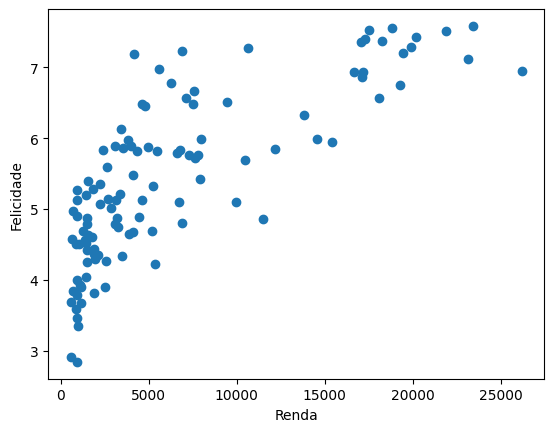

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(income,happy)
plt.xlabel('Renda')
plt.ylabel('Felicidade')
plt.show()

In [ ]:
# Classificar os dados
data.sort_values('avg_income', inplace = True)  # ordenar pela coluna avg_income e modificar o dataframe original
data

,country,adjusted_satisfaction,avg_satisfaction,std_satisfaction,avg_income,median_income,income_inequality,region,happyScore,GDP,country.1
10,Burundi,25.0,2.9,1.96,572.880,436.92,33.360000,'Sub-Saharan Africa',2.905,0.01530,Burundi
65,Madagascar,33.0,3.7,1.86,574.200,415.48,40.720000,'Sub-Saharan Africa',3.681,0.20824,Madagascar
58,Liberia,37.0,4.4,2.02,653.040,528.72,36.480000,'Sub-Saharan Africa',4.571,0.07120,Liberia
72,Mozambique,34.0,3.8,1.76,714.720,488.52,45.580000,'Sub-Saharan Africa',4.971,0.08308,Mozambique
73,Niger,34.0,3.8,1.75,718.400,535.56,37.726667,'Sub-Saharan Africa',3.845,0.06940,Niger
...,...,...,...,...,...,...,...,...,...,...,...
16,Canada,69.0,8.0,1.71,20190.780,16829.10,33.790000,'North America',7.427,1.32629,Canada
77,Norway,70.0,8.0,1.62,21877.710,19477.62,27.307500,'Western Europe',7.522,1.45900,Norway
105,United States,62.0,7.3,1.92,23127.000,17925.36,41.090000,'North America',7.119,1.39451,United States
17,Switzerland,70.0,8.0,1.62,23400.040,19442.92,32.930000,'Western Europe',7.587,1.39651,Switzerland


In [ ]:
# reseta os indices (drop retira a coluna indice antigo e o inplace modifica a DataFrame original)

data.reset_index(drop=True, inplace = True)
data

,country,adjusted_satisfaction,avg_satisfaction,std_satisfaction,avg_income,median_income,income_inequality,region,happyScore,GDP,country.1
0,Burundi,25.0,2.9,1.96,572.880,436.92,33.360000,'Sub-Saharan Africa',2.905,0.01530,Burundi
1,Madagascar,33.0,3.7,1.86,574.200,415.48,40.720000,'Sub-Saharan Africa',3.681,0.20824,Madagascar
2,Liberia,37.0,4.4,2.02,653.040,528.72,36.480000,'Sub-Saharan Africa',4.571,0.07120,Liberia
3,Mozambique,34.0,3.8,1.76,714.720,488.52,45.580000,'Sub-Saharan Africa',4.971,0.08308,Mozambique
4,Niger,34.0,3.8,1.75,718.400,535.56,37.726667,'Sub-Saharan Africa',3.845,0.06940,Niger
...,...,...,...,...,...,...,...,...,...,...,...
106,Canada,69.0,8.0,1.71,20190.780,16829.10,33.790000,'North America',7.427,1.32629,Canada
107,Norway,70.0,8.0,1.62,21877.710,19477.62,27.307500,'Western Europe',7.522,1.45900,Norway
108,United States,62.0,7.3,1.92,23127.000,17925.36,41.090000,'North America',7.119,1.39451,United States
109,Switzerland,70.0,8.0,1.62,23400.040,19442.92,32.930000,'Western Europe',7.587,1.39651,Switzerland


In [ ]:
# filtar os mais ricos (de algum critério )
richest = data[data['avg_income'] >15000]
richest

,country,adjusted_satisfaction,avg_satisfaction,std_satisfaction,avg_income,median_income,income_inequality,region,happyScore,GDP,country.1
93,Italy,57.0,6.6,1.81,15437.595000,13163.070000,34.126250,'Western Europe',5.948,1.25114,Italy
94,Ireland,64.0,7.5,1.85,16657.770000,13823.160000,32.418750,'Western Europe',6.940,1.33596,Ireland
95,Sweden,67.0,7.8,1.72,17032.755000,15166.605000,26.950000,'Western Europe',7.364,1.33171,Sweden
96,United Kingdom,60.0,7.1,1.98,17099.550000,14172.735000,34.432500,'Western Europe',6.867,1.26637,United Kingdom
97,Belgium,63.0,7.2,1.72,17168.505000,15166.455000,28.745000,'Western Europe',6.937,1.30782,Belgium
98,Finland,70.0,7.9,1.53,17310.195000,14962.560000,27.723750,'Western Europe',7.406,1.29025,Finland
99,Denmark,74.0,8.4,1.53,17496.510000,15630.885000,28.155000,'Western Europe',7.527,1.32548,Denmark
100,France,52.0,6.4,2.15,18096.788571,14971.251429,32.255714,'Western Europe',6.575,1.27778,France
101,Netherlands,69.0,7.6,1.38,18234.435000,15880.545000,29.271250,'Western Europe',7.378,1.32944,Netherlands
102,Iceland,71.0,8.1,1.64,18828.345000,16179.315000,28.780000,'Western Europe',7.561,1.30232,Iceland


In [ ]:
# outros metodos de filtragem a partir dos 'mais' ricos
richest.iloc[0] # o 'menos' rico dos 'mais' ricos (selecionar a primeira linha)
richest.iloc[-1] # o mais rico
richest.iloc[-5:] # os cinco mais rico
richest.tail(5) # os cinco mais rico utilizando tail ( 'cauda' do dataframe)


,country,adjusted_satisfaction,avg_satisfaction,std_satisfaction,avg_income,median_income,income_inequality,region,happyScore,GDP,country.1
106,Canada,69.0,8.0,1.71,20190.780,16829.10,33.7900,'North America',7.427,1.32629,Canada
107,Norway,70.0,8.0,1.62,21877.710,19477.62,27.3075,'Western Europe',7.522,1.45900,Norway
108,United States,62.0,7.3,1.92,23127.000,17925.36,41.0900,'North America',7.119,1.39451,United States
109,Switzerland,70.0,8.0,1.62,23400.040,19442.92,32.9300,'Western Europe',7.587,1.39651,Switzerland
110,Luxembourg,66.0,7.7,1.76,26182.275,22240.23,31.9500,'Western Europe',6.946,1.56391,Luxembourg


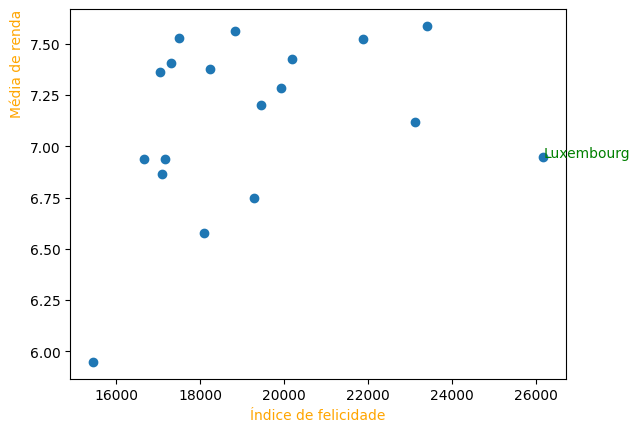

In [ ]:
# Analise de dispersão de richest

plt.scatter(richest['avg_income'],richest['happyScore'])
plt.text(richest.iloc[-1]['avg_income'],richest.iloc[-1]['happyScore'],richest.iloc[-1]['country'],color = 'green')
plt.xlabel('Índice de felicidade',color='orange')
plt.ylabel('Média de renda',loc='top',color='orange')

plt.show()

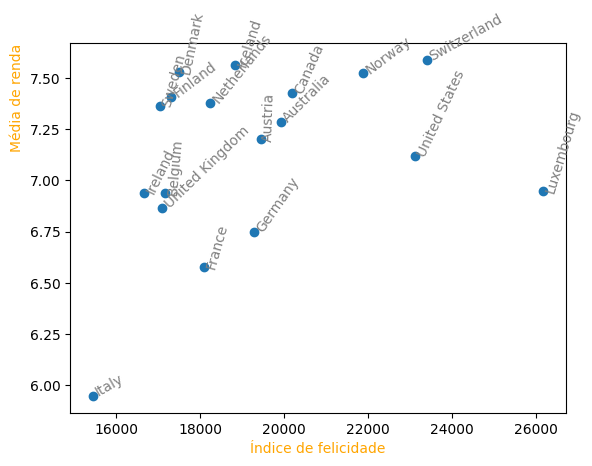

In [ ]:
# para todos os pontos
import random
plt.scatter(richest['avg_income'],richest['happyScore'])

plt.xlabel('Índice de felicidade',color='orange')
plt.ylabel('Média de renda',loc='top',color='orange')

for i, row in richest.iterrows():
  plt.text(row['avg_income'],row['happyScore'],row['country'],color = 'gray', rotation = random.randint(0,90))
plt.show()


In [ ]:
#teste
[plt.text(x=row['avg_income'], y=row['happyScore'], s=row['country']) for k,row in data.iterrows()]

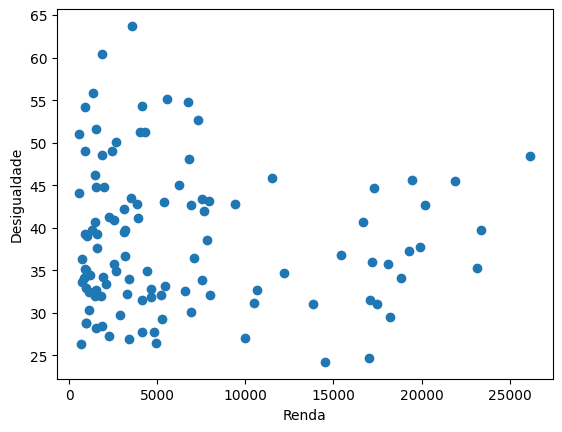

In [ ]:
# Analisara renda pela desigualdade
desigualdade = data['income_inequality']
plt.scatter(income,desigualdade)
plt.xlabel('Renda')
plt.ylabel('Desigualdade')
plt.show()

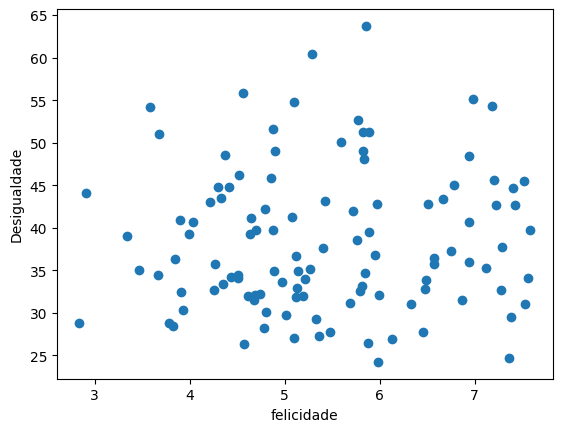

In [ ]:
# happy e desigualdade
plt.scatter(happy,desigualdade)
plt.xlabel('felicidade')
plt.ylabel('Desigualdade')
plt.show()

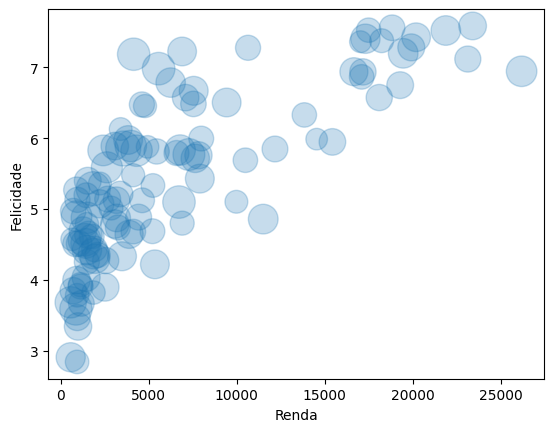

In [ ]:
plt.scatter(income,happy,s=desigualdade*10, alpha=0.25)
plt.xlabel('Renda')
plt.ylabel('Felicidade')
plt.show()

# Usando K-Means para analise de DataFrame n>3 dimensões
Alguns passos:
- Vamos fazer uma análise mais profunda nas variáveis
- biblioteca sklearn
- módulo KMeans: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html. Syntaxe:
  - class sklearn.cluster.KMeans(n_clusters=8, *, init='k-means++', n_init='auto', max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='lloyd')
  -


Precisamos preparar as variáveis (colunas do DF). Precisamos colocar um uma mesma array.

- O que vamos usar para preparar:

O método **column_stack pertence ao NumPy** e é usado para empilhar arrays unidimensionais (ou sequências semelhantes a arrays) como colunas em um array bidimensional. Ele é útil quando você deseja combinar várias sequências de dados em uma única estrutura de dados bidimensional.

Aqui está a assinatura básica do método column_stack:
numpy.column_stack(tup)
tup: É uma tupla contendo os arrays unidimensionais que você deseja empilhar como colunas no array bidimensional resultante.
Nesse caso vamos usar a 'income' e 'happy'

In [ ]:
from sklearn.cluster import KMeans
income_happy=np.column_stack((income,happy))

# primeiro treino
km_res = KMeans(n_clusters=3).fit(income_happy)

"""OBS: se ficar rodando essa célular ele vai fazer outro treina para encontrar
outros clusters. Sugestão é rodar os centro de cluster em outra célula"""

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
km_res.cluster_centers_
cluster = km_res.cluster_centers_
cluster


array([[7.57755711e+03, 5.85080769e+00],
       [1.87593022e+04, 7.03270000e+00],
       [2.19912121e+03, 4.75472308e+00]])

In [ ]:
# Desvio padrão
std_dev = np.std(income_happy,0)
std_dev[0]

6450.28056846088


O atributo **labels_ é** um dos atributos mais importantes do modelo K-Means no scikit-learn e é usado para entender a qual cluster cada ponto de dado pertence após a aplicação do algoritmo de clustering. Aqui estão alguns pontos importantes sobre este atributo:

In [ ]:
labels = km_res.labels_
labels

array([2, 2, 0, 1, 1, 2, 2, 1, 2, 0, 2, 2, 2, 0, 2, 0, 1, 1, 0, 2, 2, 2,
       0, 0, 0, 1, 2, 1, 2, 2, 0, 1, 2, 1, 1, 2, 1, 2, 2, 0, 2, 0, 0, 2,
       1, 0, 2, 0, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 1, 2, 0, 2, 2, 2, 0, 0, 0, 2, 2,
       0, 2, 1, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 1, 0, 2, 2, 2,
       2], dtype=int32)

In [ ]:
km_res.inertia_

380302659.8427371

TIpos de gráficos com cluster

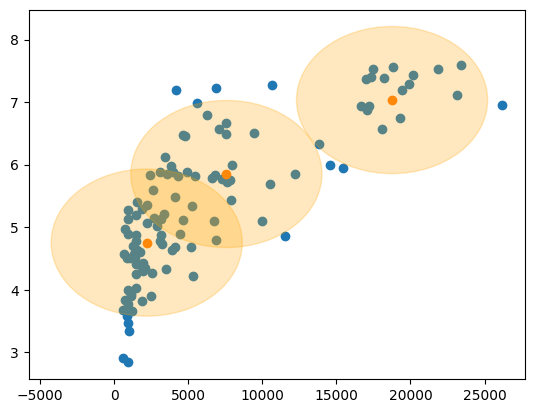

In [ ]:
from matplotlib.patches import Ellipse
plt.scatter(income,happy)
plt.scatter(cluster[:,0],cluster[:,1])
for center in cluster:
    elipse = Ellipse(xy=center, width=std_dev[0]*2, height=std_dev[1]*2, color = 'orange', alpha=0.25)
    plt.gca().add_patch(elipse)
plt.show()

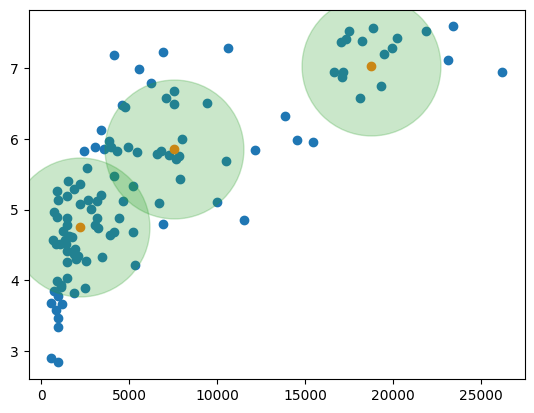

In [ ]:
plt.scatter(income,happy)
plt.scatter(cluster[:,0],cluster[:,1])
plt.scatter(cluster[:,0],cluster[:,1], s = 10000, alpha = 0.25)
plt.show()

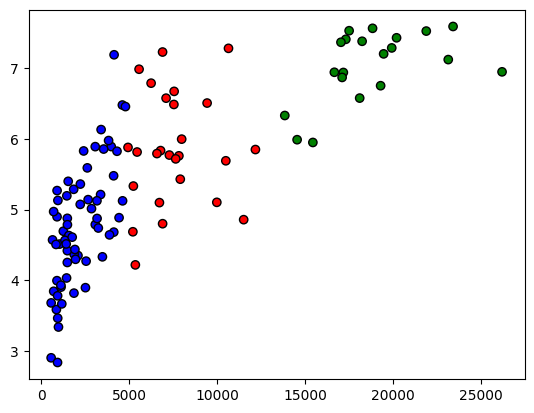

In [ ]:
# Criando gráfico de dispersão para cada clusterplt.scatter(income,happy)
cores = np.array(['r', 'g', 'b'])

plt.scatter(income,happy, c= cores[labels], marker = 'o',edgecolor = 'k')
#plt.scatter(cluster[:,0],cluster[:,1], s = 10000, alpha = 0.25)
plt.show()

In [ ]:
print(list(enumerate(labels)))

# Vou separar cada valor de cluster e armazenar em uma array. Quero fazer uma analise estátistica para cada cluster

In [ ]:
cluster_0 = []
cluster_1 = []
cluster_2 = []

# Separar os dados de cada cluster e armazenar nas arrays correspondentes
for i, label in enumerate(labels):
    if label == 0:
        cluster_0.append(income_happy[i])
    elif label == 1:
        cluster_1.append(income_happy[i])
    elif label == 2:
        cluster_2.append(income_happy[i])

# Converter as arrays para numpy arrays
cluster_0 = np.array(cluster_0)
cluster_1 = np.array(cluster_1)
cluster_2 = np.array(cluster_2)
print(cluster_1)

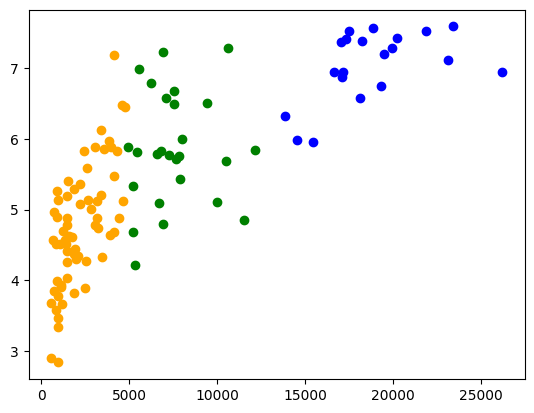

In [ ]:
plt.scatter(cluster_0[:,0],cluster_0[:,1], color = 'green')
plt.scatter(cluster_1[:,0],cluster_1[:,1], color = 'blue')
plt.scatter(cluster_2[:,0],cluster_2[:,1],color = 'orange')
plt.show()

# colocar elipse em cada cluster

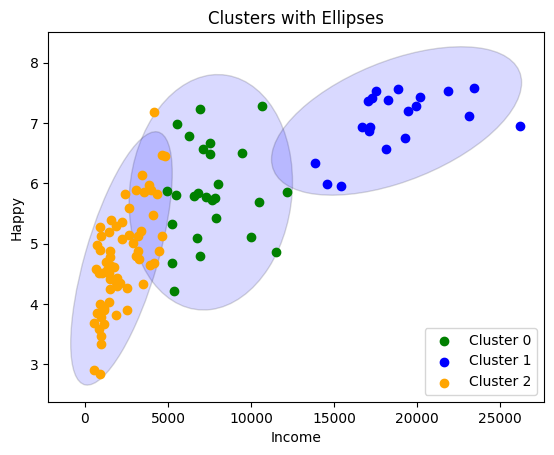

In [ ]:
# array de clusters
clusters = [income_happy[labels == i] for i in range(km_res.n_clusters)]

fig, axs = plt.subplots()

# add elipse para cada cluster
for i, cluster in enumerate(clusters):
    # Calcular as propriedades da elipse
    covariance_matrix = np.cov(cluster.T)  # Matriz de covariância (relação entre as variáveis)/ matriz transposta cluster.T
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)  # Autovalores e autovetores
    angle = np.degrees(np.arctan2(eigenvectors[1, 0], eigenvectors[0, 0]))  # Ângulo de rotação
    width = 2 * np.sqrt(5.991 * eigenvalues[0])  # Largura (95% de confiança)
    height = 2 * np.sqrt(5.991 * eigenvalues[1])  # Altura (95% de confiança)
    ellipse = Ellipse(xy=np.mean(cluster, axis=0), width=width, height=height, angle=angle, edgecolor='black', facecolor='blue',alpha =0.15)
    axs.add_patch(ellipse)

# Plotar os pontos de cada cluster
colors = ['green', 'blue', 'orange']
for i, cluster in enumerate(clusters):
    axs.scatter(cluster[:, 0], cluster[:, 1], color=colors[i], label=f'Cluster {i}')

plt.legend()
plt.xlabel('Income')
plt.ylabel('Happy')
plt.title('Clusters with Ellipses')
plt.show()

In [ ]:
#print(list(enumerate(clusters)))
angle

-89.97352709405789